In [1]:
%pylab
%matplotlib inline
import pandas as pd
import sklearn

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv('MyDataset.csv')

In [3]:
train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
trained=train.drop(['longitude','latitude','ocean_proximity'],axis=1)

In [7]:
trained.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [11]:
trained.total_bedrooms=trained.total_bedrooms.fillna(trained.total_bedrooms.mean())

In [12]:
trained.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [15]:
from sklearn.cluster import KMeans

In [16]:
cluster=KMeans(n_clusters=3)

In [17]:
trained['cluster']=cluster.fit_predict(trained)

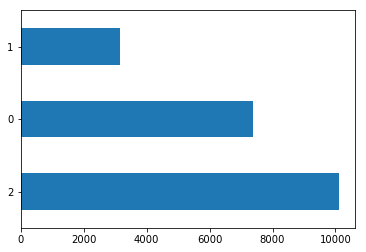

In [19]:
trained.cluster.value_counts().plot(kind='barh')

In [20]:
trained.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [21]:
from sklearn.decomposition import PCA

In [22]:
pca=PCA(n_components=2)

In [23]:
fond=trained.drop(['cluster'],axis=1)

In [24]:
fond.head()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [25]:
trained.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [29]:
trained['pca_x']=pca.fit_transform(fond)[:,0]

In [30]:
trained['pca_y']=pca.fit_transform(fond)[:,1]

In [31]:
trained.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster,pca_x,pca_y
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,245739.032220,-2669.888472
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,151655.014120,4190.070606
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,145240.832112,-1842.946615
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,134440.380227,-1949.168524
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,135341.287979,-1624.784141


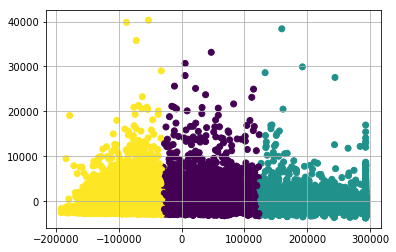

In [33]:
scatter(trained['pca_x'],trained['pca_y'],c=trained.cluster)
grid()

In [36]:
trained.groupby('cluster').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pca_x,pca_y
cluster,,,,,,,,,
0,28.423301,2866.780822,578.156067,1504.918351,544.366337,4.242597,237323.762376,30468.429258,183.149449
1,31.992362,3005.226289,536.090107,1249.830363,503.747931,6.236348,423801.007320,216945.457602,-224.243209
2,27.756444,2352.884346,509.087250,1422.134321,465.591111,2.865716,117346.488494,-89509.763625,-63.781603


In [37]:
#WHAT IF SCALED?!

In [38]:
trained.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster,pca_x,pca_y
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,245739.032220,-2669.888472
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,151655.014120,4190.070606
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,145240.832112,-1842.946615
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,134440.380227,-1949.168524
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,135341.287979,-1624.784141


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()

In [42]:
fonder=sc.fit_transform(fond)

In [51]:
shamb=pd.DataFrame({'median_Age':fonder[:,0],'total_rooms':fonder[:,1],'total_bedrooms':fonder[:,2],
                   'population':fonder[:,3],'households':fonder[:,4],'median_income':fonder[:,5],
                   'median_housevalue':fonder[:,6]})

In [52]:
shamb.head()

,households,median_Age,median_housevalue,median_income,population,total_bedrooms,total_rooms
0,-0.977033,0.982143,2.129631,2.344766,-0.974429,-0.975228,-0.804819
1,1.669961,-0.607019,1.314156,2.332238,0.861439,1.355088,2.045890
2,-0.843637,1.856182,1.258693,1.782699,-0.820777,-0.829732,-0.535746
3,-0.733781,1.856182,1.165100,0.932968,-0.766028,-0.722399,-0.624215
4,-0.629157,1.856182,1.172900,-0.012881,-0.759847,-0.615066,-0.462404


In [53]:
clusss=KMeans(n_clusters=3)

In [54]:
shamber=shamb

In [55]:
shamber['cluster']=clusss.fit_predict(shamber)

In [56]:
shamber.head()

,households,median_Age,median_housevalue,median_income,population,total_bedrooms,total_rooms,cluster
0,-0.977033,0.982143,2.129631,2.344766,-0.974429,-0.975228,-0.804819,0
1,1.669961,-0.607019,1.314156,2.332238,0.861439,1.355088,2.045890,2
2,-0.843637,1.856182,1.258693,1.782699,-0.820777,-0.829732,-0.535746,0
3,-0.733781,1.856182,1.165100,0.932968,-0.766028,-0.722399,-0.624215,0
4,-0.629157,1.856182,1.172900,-0.012881,-0.759847,-0.615066,-0.462404,0


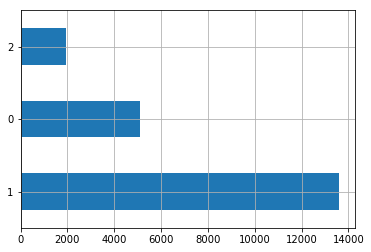

In [58]:
shamber.cluster.value_counts().plot(kind='barh')
grid()

In [59]:
shamber['pca_x']=pca.fit_transform(shamb)[:,0]

In [60]:
shamber['pca_y']=pca.fit_transform(shamb)[:,1]

In [61]:
shamber.head()

,households,median_Age,median_housevalue,median_income,population,total_bedrooms,total_rooms,cluster,pca_x,pca_y
0,-0.977033,0.982143,2.129631,2.344766,-0.974429,-0.975228,-0.804819,0,-1.992473,3.291052
1,1.669961,-0.607019,1.314156,2.332238,0.861439,1.355088,2.045890,2,3.274703,2.226463
2,-0.843637,1.856182,1.258693,1.782699,-0.820777,-0.829732,-0.535746,0,-1.883161,2.351038
3,-0.733781,1.856182,1.165100,0.932968,-0.766028,-0.722399,-0.624215,0,-1.826694,1.700334
4,-0.629157,1.856182,1.172900,-0.012881,-0.759847,-0.615066,-0.462404,0,-1.675898,1.080160


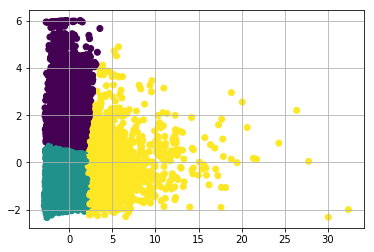

In [62]:
scatter(shamber['pca_x'],shamber['pca_y'],c=shamber.cluster)
grid()

In [63]:
shamb.groupby('cluster').mean()

,households,median_Age,median_housevalue,median_income,population,total_bedrooms,total_rooms,pca_x,pca_y
cluster,,,,,,,,,
0,-0.179388,0.128097,1.311434,1.117621,-0.252291,-0.202366,-0.013862,-0.381373,1.893900
1,-0.255200,0.083046,-0.496996,-0.429674,-0.203534,-0.246242,-0.302162,-0.512032,-0.673392
2,2.265023,-0.920175,0.049472,0.085236,2.093302,2.262398,2.160429,4.600863,-0.240252


In [155]:
file=trained

In [158]:
filed= file.drop(['cluster','pca_x','pca_y'],axis=1)

In [159]:
filed.rename(columns={'housing_median_age':'Housing_median_age',
             'total_rooms':'Total_rooms',
             'total_bedrooms':'Total_bedrooms',
             'population':'Population',
              'households':'Households',
             'median_income':'median_income',
             'median_house_value':'Median_house_value'},inplace=True)


In [160]:
filed.head()

,Housing_median_age,Total_rooms,Total_bedrooms,Population,Households,median_income,Median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [154]:
snake.shape


(0, 16)

In [134]:
snake=snake.drop(['median_Age',
             'total_rooms',
             'total_bedrooms',
             'population',
              'households',
             'median_income',
             'median_housevalue','pca_x','pca_y'],axis=1)

In [129]:
snake.head()

,Housing_median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Median_house_value,cluster
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [131]:
snake.cluster.value_counts()

0    4
2    1
Name: cluster, dtype: int64